In [23]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
%autoreload 2

In [42]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from model import regression
from sklearn.model_selection import train_test_split
from data_loader import load_house_attributes
from data_sources import source_choice
from processing_attributes import process_house_attributes

In [43]:
df = source_choice()

In [44]:
df_paris = load_house_attributes(df)

In [29]:
df_paris.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186765 entries, 0 to 313775
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   No disposition             186765 non-null  int32         
 1   Date mutation              186765 non-null  datetime64[ns]
 2   Nature mutation            186765 non-null  object        
 3   Valeur fonciere            186765 non-null  float64       
 4   Type de voie               186765 non-null  object        
 5   Code postal                186765 non-null  float64       
 6   Commune                    186765 non-null  object        
 7   Code departement           186765 non-null  object        
 8   Code commune               186765 non-null  int32         
 9   Section                    186765 non-null  object        
 10  Nombre de lots             186765 non-null  int32         
 11  Type local                 186765 non-null  object       

In [30]:
df_paris.describe()

,No disposition,Valeur fonciere,Code postal,Code commune,Nombre de lots,Surface reelle bati,Nombre pieces principales,year,months,day
count,186765.000000,1.867650e+05,186765.000000,186765.000000,186765.000000,186765.000000,186765.000000,186765.000000,186765.000000,186765.000000
mean,1.011763,6.126856e+05,75013.379766,113.379766,1.613129,52.087024,2.363403,2017.963907,6.686478,16.731449
std,0.209475,6.746366e+05,4.863452,4.863452,0.856757,37.446249,1.267981,1.372753,3.413862,8.877829
min,1.000000,0.000000e+00,75001.000000,101.000000,0.000000,1.000000,0.000000,2016.000000,1.000000,1.000000
25%,1.000000,2.425500e+05,75010.000000,110.000000,1.000000,27.000000,1.000000,2017.000000,4.000000,9.000000
50%,1.000000,4.041000e+05,75015.000000,115.000000,2.000000,42.000000,2.000000,2018.000000,7.000000,17.000000
75%,1.000000,7.000000e+05,75017.000000,117.000000,2.000000,66.000000,3.000000,2019.000000,10.000000,25.000000
max,24.000000,5.000000e+06,75020.000000,120.000000,27.000000,299.000000,10.000000,2020.000000,12.000000,31.000000


<Figure size 720x720 with 0 Axes>

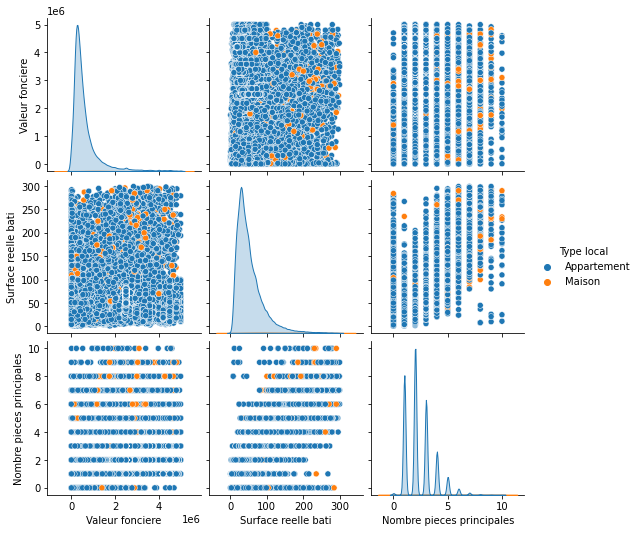

In [31]:
plt.figure(figsize=(10, 10))
sns.pairplot(df_paris[['Valeur fonciere', 'Surface reelle bati', 'Nombre pieces principales', 'Type local']],
             hue='Type local')

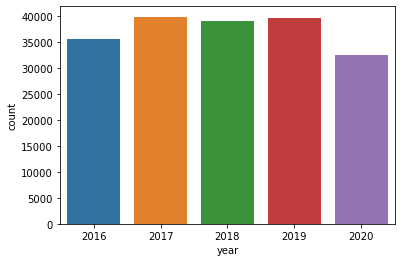

In [32]:
sns.countplot(x="year", data=df_paris)

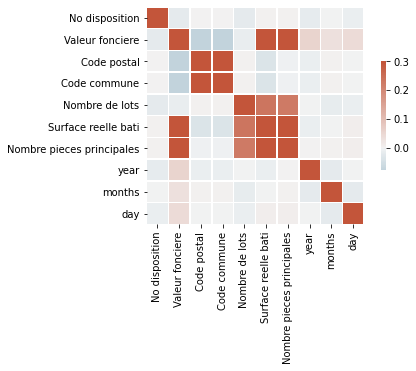

In [33]:
corr = df_paris.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [34]:
train, test = train_test_split(df_paris, test_size=0.25, random_state=42)

In [35]:
print('Training Shape:', train.shape)
print('Testing Shape:', test.shape)

Training Shape: (140073, 17)
Testing Shape: (46692, 17)


In [36]:
train_x, test_x = process_house_attributes(df_paris, train, test)

In [37]:
train_y = train["Valeur fonciere"]
test_y = test["Valeur fonciere"]

In [54]:
regr = regression(train_x, train_y)

months 3.9
day 0.1
No disposition 1.2
Nombre de lots 1.2
Surface reelle bati 0.2
Nombre pieces principales 41.1
Commune 52.2
Type local 0.1


In [55]:
"""Les critères les plus importants pour prédire la valeur d'un bien à Paris sont l'arrondissement et le nombre de pièces, la saisonnalité ou le type de bien n'influencent pas le modèle"""

"Les critères les plus importants pour prédire la valeur d'un bien à Paris sont l'arrondissement et le nombre de pièces, la saisonnalité ou le type de bien n'influencent pas le modèle"

In [56]:
prediction_regr = regr.predict(test_x)
errors_regr = abs(prediction_regr - test_y)
print('Mean Absolute Error regr:', round(np.mean(errors_regr), 2), 'euros.')

Mean Absolute Error regr: 221088.99 euros.


In [41]:
'''Notre model n'est pas performant car il n'y a pas assez de données et certaines données n'ont pas pu être correctement exploitées'''

"Notre model n'est pas performant car il n'y a pas assez de données et certaines données n'ont pas pu être correctement exploitées"